In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sql_to_dataframe as std
import rain

In [53]:
df = std.sqlToDataframe(rain.toRelPath("data\\dataframe-cache.csv"), 
    useCache = True)

In [54]:
def portfolioToValue(fees, mid, portfolio):
    midShift = mid.shift(-1)
    rMid = midShift / mid
    rValue = portfolio * rMid
    rValue[rValue == 0] = 1
    value = rValue.cumprod() * mid[0]
    
    dPortfolio = portfolio.shift(-1) - portfolio
    dRelValueFees = 1 - dPortfolio.abs() * FEE_RATIO
    #value with fees relative to value without fees
    relValueFees = dRelValueFees.cumprod()
    #value with fees relative to btc
    relBTCValueFees = relValueFees * relBTCValue
    
    valueFees = relValueFees * value

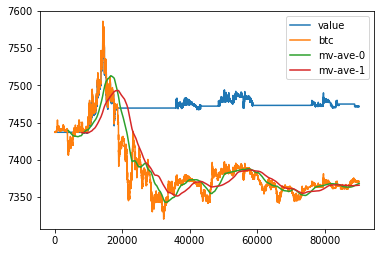

In [55]:
PERIODS = [4000, 8000]

mvAve = [df["mid"].rolling(PERIODS[0]).mean(), 
    df["mid"].rolling(PERIODS[1]).mean()]
mvDiff = mvAve[1] - mvAve[0]
portfolio = (mvDiff < 0).astype(float)
midShift = df["mid"].shift(-1)
rMid = midShift / df["mid"]
rValue = portfolio * rMid
rValue[rValue == 0] = 1
value = rValue.cumprod() * df["mid"][0]
relBTCValue = value / df["mid"]

plt.plot(value, label = "value")
plt.plot(df["mid"], label = "btc")
plt.plot(mvAve[0], label = "mv-ave-0")
plt.plot(mvAve[1], label = "mv-ave-1")
plt.legend()
plt.show()

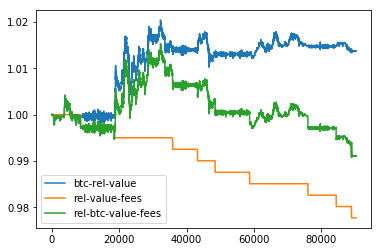

In [59]:
FEE_RATIO = 25 * 1e-4

dPortfolio = portfolio.shift(-1) - portfolio
dRelValueFees = 1 - dPortfolio.abs() * FEE_RATIO
#value with fees relative to value without fees
relValueFees = dRelValueFees.cumprod()
#value with fees relative to btc
relBTCValueFees = relValueFees * relBTCValue
plt.plot(relBTCValue, label = "btc-rel-value")
plt.plot(relValueFees, label = "rel-value-fees")
plt.plot(relBTCValueFees, label = "rel-btc-value-fees")
plt.legend()
plt.show()

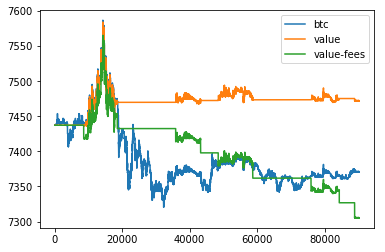

In [60]:
valueFees = relValueFees * value
plt.plot(df["mid"], label = "btc")
plt.plot(value, label = "value")
plt.plot(valueFees, label = "value-fees")
plt.legend()
plt.show()

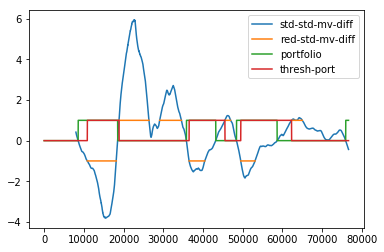

In [40]:
ACTION_THRESHOLD = 10 * 1e-4

stdMvDiff = mvDiff / df["mid"]
#reduced using threshold
redStdMvDiff = pd.DataFrame(np.zeros(len(df)))[0]
redStdMvDiff[stdMvDiff > ACTION_THRESHOLD] = 1
redStdMvDiff[stdMvDiff < -ACTION_THRESHOLD] = -1
redStdMvDiff[redStdMvDiff == 0] = None
threshPort = 1 - (redStdMvDiff.fillna(method = "pad") + 1) / 2
threshPort = threshPort.fillna(value = 0)
plt.plot(stdMvDiff / ACTION_THRESHOLD, label = "std-std-mv-diff")
plt.plot(redStdMvDiff, label = "red-std-mv-diff")
plt.plot(portfolio, label = "portfolio")
plt.plot(threshPort, label = "thresh-port")
plt.legend()
plt.show()

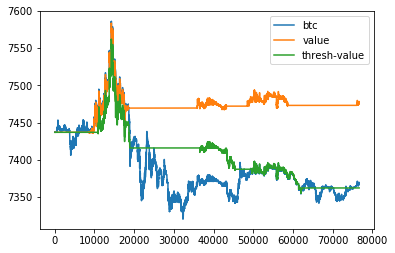

In [41]:
rThreshValue = threshPort * rMid
rThreshValue[rThreshValue == 0] = 1
threshValue = rThreshValue.cumprod() * df["mid"][0]
relBTCThreshValue = threshValue / df["mid"]

plt.plot(df["mid"], label = "btc")
plt.plot(value, label = "value")
plt.plot(threshValue, label = "thresh-value")
plt.legend()
plt.show()

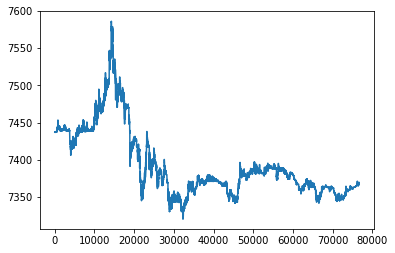

In [42]:
blue = df["mid"]
red = threshPort

plt.plot(blue)

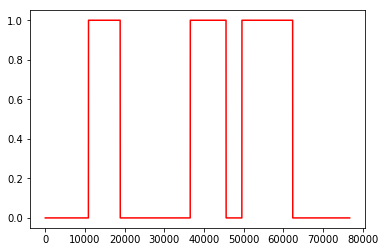

In [43]:
plt.plot(red, c = "r")

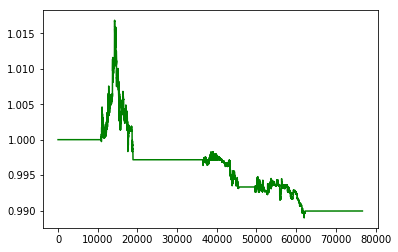

In [48]:
blueShift = blue.shift(-1)
green =  (1+ (blueShift - blue)* red/ blue).cumprod()

plt.plot(green, c = "g")

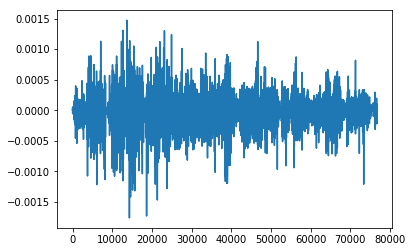

In [45]:
plt.plot((blueShift - blue)/ blue)

0.005


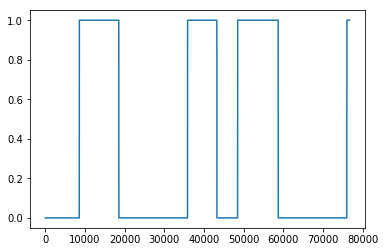

In [51]:
btc = df["mid"]
portfolio = portfolio
value = value
valueFees = valueFees
FEE_RATIO = FEE_RATIO

print(FEE_RATIO)
plt.plot(portfolio)

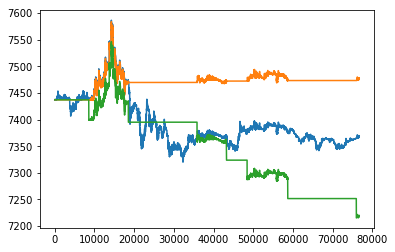

In [52]:
plt.plot(btc)
plt.plot(value)
plt.plot(valueFees)